In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display, Markdown, Latex
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import math

url = 'https://raw.githubusercontent.com/RamiKrispin/coronavirus-csv/master/coronavirus_dataset.csv'
#jh_conf = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
jh_conf = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
#jh_dead = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
jh_dead = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

show = 'dead'

if show == 'dead':
    df = pd.read_csv(jh_dead)
elif show == 'conf':
    df = pd.read_csv(jh_conf)
#df.columns = ['state', 'region', 'lat', 'long', 'date', 'cases', 'type']

#display(Markdown('## Updated since: ' + df.date.max()))


In [51]:
df[df['Country/Region']=='Sweden']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
205,NaN,Sweden,63.0,16.0,0,0,0,0,0,0,...,1511,1540,1580,1765,1937,2021,2152,2192,2194,2274


In [52]:
df = df.groupby('Country/Region').sum()

In [53]:
df = df.drop(['Lat', 'Long'], axis=1)

In [54]:
regions = list(df.index.unique())
regions.sort()
#print(regions)

In [55]:
jh = df
selected_countries = [
    'Sweden',
    'Iran',
    'Italy',
    'US',
    'United Kingdom',
    'Germany',
    'France',
    'Denmark',
    'Finland',
    'Norway',
    #'South Korea',
    #'Korea, South',
    'Spain'
    #'Japan'
]

#selcon = df[(df.region.isin(selected_countries)) & (df.type == 'confirmed')]
#selcon = df[(df.region.isin(selected_countries))]
selcon = jh[jh.index.isin(selected_countries)]
selcon

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Denmark,0,0,0,0,0,0,0,0,0,0,...,346,355,364,370,384,394,403,418,422,427
Finland,0,0,0,0,0,0,0,0,0,0,...,90,94,98,141,149,172,177,186,190,193
France,0,0,0,0,0,0,0,0,0,0,...,19345,19744,20292,20829,21373,21889,22279,22648,22890,23327
Germany,0,0,0,0,0,0,0,0,0,0,...,4459,4586,4862,5033,5279,5575,5760,5877,5976,6126
Iran,0,0,0,0,0,0,0,0,0,0,...,5031,5118,5209,5297,5391,5481,5574,5650,5710,5806
Italy,0,0,0,0,0,0,0,0,0,0,...,23227,23660,24114,24648,25085,25549,25969,26384,26644,26977
Norway,0,0,0,0,0,0,0,0,0,0,...,164,165,181,182,187,194,199,201,201,205
Spain,0,0,0,0,0,0,0,0,0,0,...,20043,20453,20852,21282,21717,22157,22524,22902,23190,23521
Sweden,0,0,0,0,0,0,0,0,0,0,...,1511,1540,1580,1765,1937,2021,2152,2192,2194,2274


In [56]:
jhc = selcon.stack().reset_index()
jhc.columns = ['region','date','cases']
jhc.date = pd.to_datetime(jhc.date)
jhc

,region,date,cases
0,Denmark,2020-01-22,0
1,Denmark,2020-01-23,0
2,Denmark,2020-01-24,0
3,Denmark,2020-01-25,0
4,Denmark,2020-01-26,0
...,...,...,...
1062,United Kingdom,2020-04-23,18791
1063,United Kingdom,2020-04-24,19567
1064,United Kingdom,2020-04-25,20381
1065,United Kingdom,2020-04-26,20794


In [57]:
csummed = jhc

In [58]:
last = csummed[csummed.date == csummed.date.max()]
last

,region,date,cases
96,Denmark,2020-04-27,427
193,Finland,2020-04-27,193
290,France,2020-04-27,23327
387,Germany,2020-04-27,6126
484,Iran,2020-04-27,5806
581,Italy,2020-04-27,26977
678,Norway,2020-04-27,205
775,Spain,2020-04-27,23521
872,Sweden,2020-04-27,2274
969,US,2020-04-27,56259


In [59]:
if True == False:
    sns.set()
    sns.set_style('whitegrid')
    sns.set_palette("Accent")
    sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 4})
    fig, ax = plt.subplots(figsize=(24,14))
    plt.xticks(rotation=90)
    plot = sns.lineplot(data=csummed, hue='region', x='date', y='cases', markers=True, legend='brief')
    plot.set_yscale('linear')  # set_yscale is a function, not a string
    plot.set_title('COVID-19 confirmed cases', size=24)
    plot.set_ylabel(None)
    plot.set_xlabel(None)
    ax.set_yticks([1,2,4,8,15,30,60,125,250,500,1000,2000,4000,8000,16000,32000,64000])
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.ylim(1,800)
    plt.xlim('2020-02-01','2020-04-20')
    #for index, row in last.iterrows():
    #    fig.text(0.87, 0.15+(0.69/math.log(last.cases.max())*math.log(row.cases)), row.region)


In [60]:
if show == 'dead':
    dayzero = csummed[(csummed.cases >=3)].groupby('region').min()
elif show == 'conf':
    dayzero = csummed[(csummed.cases >=30)].groupby('region').min()
#dayzero

In [61]:
selected_dz = dayzero.index.to_list()
csummed = csummed[csummed.region.isin(selected_dz)]
#csummed

In [62]:
for index, row in csummed.iterrows():
    dz = dayzero[dayzero.index == row.region]
    if row.date >= dz.iloc[0]['date']:
        row.n50 = row.date - dz.iloc[0]['date'] + pd.Timedelta(days=1)
        csummed.loc[index, 'n50'] = row.n50
        #print('updated ' + str(row.n50))

In [63]:
csummed['n50'] = csummed['n50'].dt.days.fillna(0).astype('int32')

In [64]:


def multilist(start, hop, items):
    ls = []

    ls.append(start)
    a = start
    b = a*2

    while len(ls) < items:
        #print(f'A: {a}, B: {b}')
        step = (b-a)/hop
        for i in range(hop):
            ls.append(ls[-1]+step)
        a = ls[-1]
        b = a*2
    
    return ls[1:items]



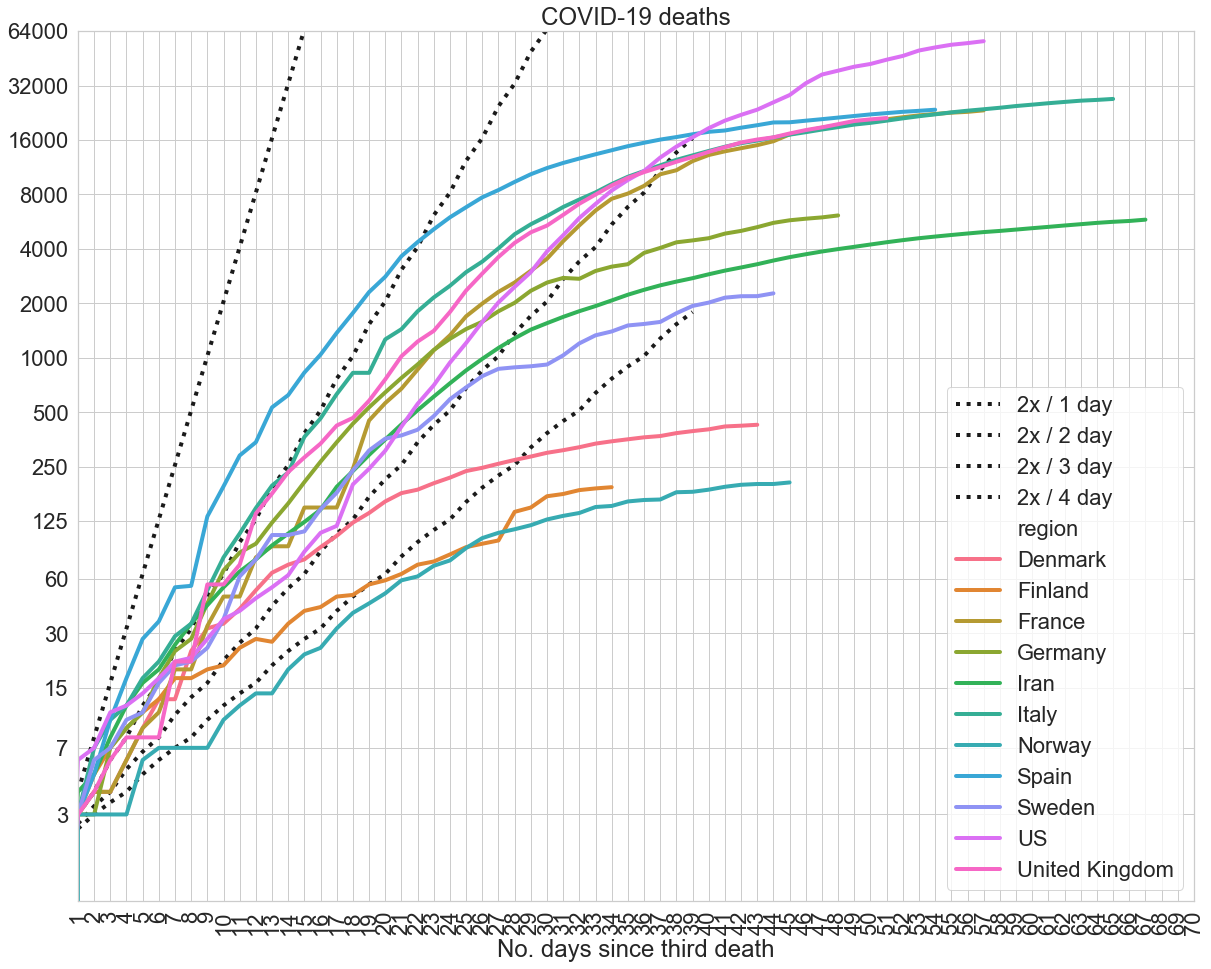

In [65]:
xs = np.arange(-3,31)

y4s = np.array(multilist(2,4,40))
y3s = np.array(multilist(2,3,40))
y2s = np.array(multilist(2,2,40))
y1s = np.array(multilist(2,1,40))
xys = np.arange(1,40)

fig, ax = plt.subplots(figsize=(20,16))

plt.plot(xys,y1s,'k:', label='2x / 1 day')
plt.plot(xys,y2s,'k:', label='2x / 2 day')
plt.plot(xys,y3s,'k:', label='2x / 3 day')
plt.plot(xys,y4s,'k:', label='2x / 4 day')

sns.set()
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 4})
sns.set_style('whitegrid')
sns.set_palette("Accent")

g = sns.lineplot(data=csummed, hue='region', x='n50', y='cases', markers=True, legend='brief')


g.set_yscale('log')

g.set_title('COVID-19 deaths', size=24)
g.set_ylabel(None)
g.set_xlabel('No. days since third death')

ax.set_xticks(np.arange(1,80))
plt.xticks(rotation=90)

ax.set_yticks([3, 7, 15, 30, 60, 125, 250, 500, 1000, 2000, 4000, 8000,16000,32000,64000,128000,256000,512000,1024000])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

if show == 'dead':
    plt.ylim(1,64000)
elif show == 'conf':
    plt.ylim(1,1024000)
    
plt.xlim(1,70)

plt.savefig('graphs/covid19n3day.png')